# Import liberaries

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("sonar/sonar_data.csv",header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Train/Test split

In [4]:
X = df.drop(columns=[60])
Y = df[60]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
print(f"all data ==> {df.shape}\nx_train:{x_train.shape}\ny_train:{y_train.shape}\nx_test:{x_test.shape}\ny_test:{y_test.shape}")

all data ==> (208, 61)
x_train:(166, 60)
y_train:(166,)
x_test:(42, 60)
y_test:(42,)


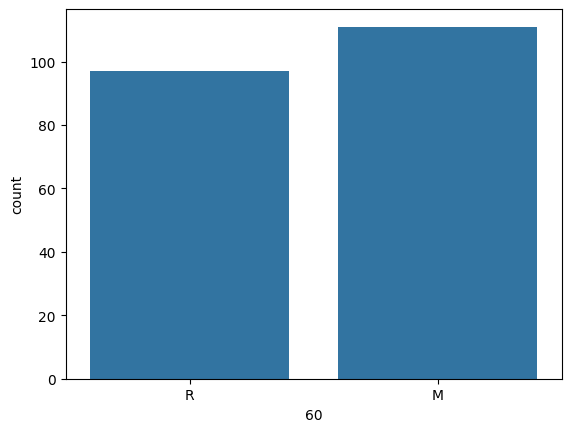

In [6]:
sns.countplot(x=df[60])
plt.show()

In [88]:
# df.describe()

In [8]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

## M --> Mine
## R --> Rock

In [9]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### Model evaluation

In [41]:
from sklearn.metrics import accuracy_score

def model_accuracy(model):
    x_train_prediction = model.predict(x_train)
    training_data_accuracy = accuracy_score(y_train, x_train_prediction)
    x_test_prediction = model.predict(x_test)
    test_data_accuracy = accuracy_score(y_test, x_test_prediction)
    print(f"Accuracy on train data: {training_data_accuracy:.4f}")
    print(f"Accuracy on test data: {test_data_accuracy:.4f}")
    

# Model training 

## 1_LogisticRegression

In [42]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
model_accuracy(model)

Accuracy on train data: 0.8253
Accuracy on test data: 0.7381


## 2_Random Forest

In [44]:
model_2 = RandomForestClassifier(n_estimators=10,max_depth=10)
model_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [45]:
model_accuracy(model_2)

Accuracy on train data: 0.9819
Accuracy on test data: 0.7143


## 3_SVM

In [46]:
from sklearn.svm import SVC
model_3=SVC(kernel="poly")
model_3.fit(x_train,y_train)

SVC(kernel='poly')

In [47]:
model_accuracy(model_3)

Accuracy on train data: 0.9217
Accuracy on test data: 0.8333


### Making a predictive system

In [54]:
input_data = (0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,
0.2471,0.2680,0.3049,0.2863,0.2294,0.1165,0.2127,0.2062,0.2222,0.3241,0.4330,
0.5071,0.5944,0.7078,0.7641,0.8878,0.9711,0.9880,0.9812,0.9464,0.8542,0.6457,
0.3397,0.3828,0.3204,0.1331,0.0440,0.1234,0.2030,0.1652,0.1043,0.1066,0.2110,
0.2417,0.1631,0.0769,0.0723,0.0912,0.0812,0.0496,0.0101,0.0089,0.0083,0.0080,
0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014
)

input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model_3.predict(input_data_reshaped)

if prediction[0] == "R":
    print("The object is a Rock")
else:
    print("The object is a Mine")

The object is a Mine
